In [1]:
!pip install matplotlib

You should consider upgrading via the 'c:\conda\python.exe -m pip install --upgrade pip' command.


In [2]:
!pip install wordcloud

You should consider upgrading via the 'c:\conda\python.exe -m pip install --upgrade pip' command.


In [1]:
import pandas as pd
import glob
import re
from functools import reduce
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS, WordCloud

In [2]:
all_files = glob.glob('8장_data/myCabinetExcelData*.xls')
all_files

['8장_data\\myCabinetExcelData (1).xls',
 '8장_data\\myCabinetExcelData (2).xls',
 '8장_data\\myCabinetExcelData (3).xls',
 '8장_data\\myCabinetExcelData (4).xls',
 '8장_data\\myCabinetExcelData (5).xls',
 '8장_data\\myCabinetExcelData (6).xls',
 '8장_data\\myCabinetExcelData (7).xls',
 '8장_data\\myCabinetExcelData (8).xls',
 '8장_data\\myCabinetExcelData (9).xls',
 '8장_data\\myCabinetExcelData.xls']

In [3]:
all_files_data = [] # 10개의 엑셀 파일 이름을 all_files 리스트에 저장한다
for file in all_files:
    data_frame = pd.read_excel(file)
    all_files_data.append(data_frame)
all_files_data[0] # 작업 내용 확인

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,"Authors' Response to Gong's, “Comment on Data ...",unknown,Mary Ann Leibert,2014
1,NaN,2,Correction to: Predictive Modeling with Big Da...,unknown,Mary Ann Leibert,2019
2,NaN,3,A Big Data Guide to Understanding Climate Chan...,unknown,Mary Ann Leibert,2014
3,NaN,4,Why Big Data = Big Deal,unknown,Mary Ann Leibert,2014
4,NaN,5,Data Science and its Relationship to Big Data ...,unknown,Mary Ann Leibert,2013
...,...,...,...,...,...,...
95,NaN,96,Health big data analytics: current perspective...,"Kuo, Mu-Hsing; Sahama, Tony; Kushniruk, Andre ...",Inderscience,2014
96,NaN,97,Health big data analytics: current perspective...,"Kuo, Mu-Hsing; Sahama, Tony; Kushniruk, Andre ...",Inderscience,2014
97,NaN,98,A big data analytics framework for border cros...,"Wang, Haibo; Huo, Da; Xu, Yaquan",Inderscience,2017
98,NaN,99,Intelligent big data analysis: a review,"Tsai, Chun-Wei; Yang, Ya-Lan; Chiang, Ming-Cha...",Inderscience,2014


In [4]:
all_files_data_concat = pd.concat(all_files_data, axis=0, ignore_index = True)
all_files_data_concat # 출력하여 내용 확인

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,"Authors' Response to Gong's, “Comment on Data ...",unknown,Mary Ann Leibert,2014
1,NaN,2,Correction to: Predictive Modeling with Big Da...,unknown,Mary Ann Leibert,2019
2,NaN,3,A Big Data Guide to Understanding Climate Chan...,unknown,Mary Ann Leibert,2014
3,NaN,4,Why Big Data = Big Deal,unknown,Mary Ann Leibert,2014
4,NaN,5,Data Science and its Relationship to Big Data ...,unknown,Mary Ann Leibert,2013
...,...,...,...,...,...,...
995,NaN,96,Health big data analytics: current perspective...,"Kuo, Mu-Hsing; Sahama, Tony; Kushniruk, Andre ...",Inderscience,2014
996,NaN,97,Health big data analytics: current perspective...,"Kuo, Mu-Hsing; Sahama, Tony; Kushniruk, Andre ...",Inderscience,2014
997,NaN,98,A big data analytics framework for border cros...,"Wang, Haibo; Huo, Da; Xu, Yaquan",Inderscience,2017
998,NaN,99,Intelligent big data analysis: a review,"Tsai, Chun-Wei; Yang, Ya-Lan; Chiang, Ming-Cha...",Inderscience,2014


In [5]:
all_files_data_concat.to_csv('8장_data/riss_bigdata.csv', encoding='utf-8', index=False)

In [6]:
all_title = all_files_data_concat['제목']
all_title

0      Authors' Response to Gong's, “Comment on Data ...
1      Correction to: Predictive Modeling with Big Da...
2      A Big Data Guide to Understanding Climate Chan...
3                                Why Big Data = Big Deal
4      Data Science and its Relationship to Big Data ...
                             ...                        
995    Health big data analytics: current perspective...
996    Health big data analytics: current perspective...
997    A big data analytics framework for border cros...
998              Intelligent big data analysis: a review
999    Guest Editorial: Big Scholar Data Discovery an...
Name: 제목, Length: 1000, dtype: object

In [7]:
stopWords = set(stopwords.words('english'))
lemma = WordNetLemmatizer()

In [11]:
words = []

for title in all_title:
    EnWords = re.sub(r"[^a-zA-Z]+"," ", str(title))
    EnWordsToken = word_tokenize(EnWords.lower())
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords]
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop]
    words.append(EnWordsTokenStopLemma)

In [12]:
print(words)

[['author', 'response', 'gong', 'comment', 'data', 'science', 'relationship', 'big', 'data', 'data', 'driven', 'decision', 'making'], ['correction', 'predictive', 'modeling', 'big', 'data', 'bigger', 'really', 'better', 'junqu', 'de', 'fortuny', 'e', 'marten', 'provost', 'f', 'big', 'data'], ['big', 'data', 'guide', 'understanding', 'climate', 'change', 'case', 'theory', 'guided', 'data', 'science'], ['big', 'data', 'big', 'deal'], ['data', 'science', 'relationship', 'big', 'data', 'data', 'driven', 'decision', 'making'], ['big', 'boe', 'fusing', 'spanish', 'official', 'gazette', 'big', 'data', 'technology'], ['resting', 'state', 'fmri', 'functional', 'connectivity', 'big', 'data', 'preprocessing', 'pipeline', 'topological', 'data', 'analysis'], ['reference', 'architecture', 'big', 'data', 'solution', 'introducing', 'model', 'perform', 'predictive', 'analytics', 'using', 'big', 'data', 'technology'], ['thermal', 'aware', 'dvfs', 'enabled', 'big', 'data', 'task', 'scheduling', 'data', '

In [13]:
words2 = list(reduce(lambda x, y: x+y, words))
print(words2)

['author', 'response', 'gong', 'comment', 'data', 'science', 'relationship', 'big', 'data', 'data', 'driven', 'decision', 'making', 'correction', 'predictive', 'modeling', 'big', 'data', 'bigger', 'really', 'better', 'junqu', 'de', 'fortuny', 'e', 'marten', 'provost', 'f', 'big', 'data', 'big', 'data', 'guide', 'understanding', 'climate', 'change', 'case', 'theory', 'guided', 'data', 'science', 'big', 'data', 'big', 'deal', 'data', 'science', 'relationship', 'big', 'data', 'data', 'driven', 'decision', 'making', 'big', 'boe', 'fusing', 'spanish', 'official', 'gazette', 'big', 'data', 'technology', 'resting', 'state', 'fmri', 'functional', 'connectivity', 'big', 'data', 'preprocessing', 'pipeline', 'topological', 'data', 'analysis', 'reference', 'architecture', 'big', 'data', 'solution', 'introducing', 'model', 'perform', 'predictive', 'analytics', 'using', 'big', 'data', 'technology', 'thermal', 'aware', 'dvfs', 'enabled', 'big', 'data', 'task', 'scheduling', 'data', 'center', 'big', '

In [16]:
count = Counter(words2)
count # 출력하여 내용확인

Counter({'author': 4,
         'response': 4,
         'gong': 2,
         'comment': 2,
         'data': 1613,
         'science': 49,
         'relationship': 6,
         'big': 1399,
         'driven': 26,
         'decision': 24,
         'making': 20,
         'correction': 6,
         'predictive': 15,
         'modeling': 11,
         'bigger': 7,
         'really': 6,
         'better': 3,
         'junqu': 2,
         'de': 2,
         'fortuny': 2,
         'e': 9,
         'marten': 2,
         'provost': 2,
         'f': 4,
         'guide': 2,
         'understanding': 10,
         'climate': 7,
         'change': 15,
         'case': 11,
         'theory': 7,
         'guided': 2,
         'deal': 20,
         'boe': 2,
         'fusing': 2,
         'spanish': 2,
         'official': 2,
         'gazette': 2,
         'technology': 28,
         'resting': 2,
         'state': 10,
         'fmri': 2,
         'functional': 2,
         'connectivity': 2,
         'preproce

In [34]:
word_count = dict()

for tag, counts in count.most_common(50):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

data : 1613
big : 1399
analytics : 133
analysis : 72
based : 56
using : 55
challenge : 50
science : 49
management : 48
system : 47
approach : 42
research : 42
earth : 40
model : 37
health : 35
new : 35
smart : 34
cloud : 31
issue : 30
mining : 30
opportunity : 30
technology : 28
learning : 28
review : 28
use : 27
driven : 26
processing : 26
framework : 26
information : 26
small : 26
efficient : 25
healthcare : 25
decision : 24
perspective : 24
survey : 23
knowledge : 22
application : 22
city : 22
computing : 21
market : 21
business : 21
making : 20
deal : 20
quality : 20
service : 20
era : 19
social : 18
design : 18
insight : 18
care : 17


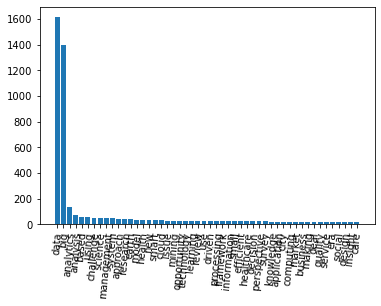

In [35]:
#del word_count['big']
#del word_count['data']

sorted_Keys = sorted(word_count, key = word_count.get, reverse = True)
sorted_Values = sorted(word_count.values(), reverse = True)
plt.bar(range(len(word_count)), sorted_Values, align = 'center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation = '85')
plt.show()

In [36]:
all_files_data_concat['doc_count'] = 0
summary_year = all_files_data_concat.groupby('출판일', as_index=False)['doc_count'].count()
summary_year # 출력하여 내용확인

,출판일,doc_count
0,1994,1
1,1995,1
2,1996,1
3,1998,1
4,2002,4
5,2003,1
6,2004,2
7,2005,3
8,2007,2
9,2008,3


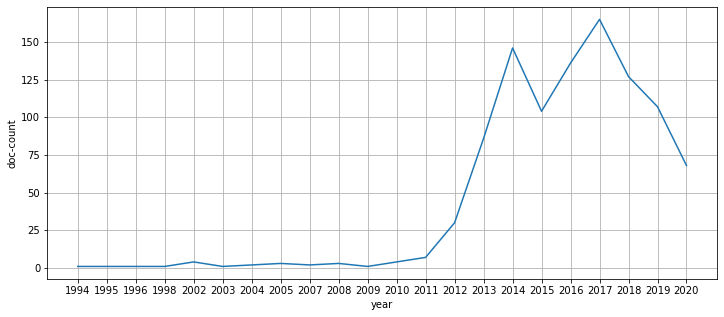

In [37]:
plt.figure(figsize = (12,5))
plt.xlabel("year")
plt.ylabel("doc-count")
plt.grid(True)
plt.plot(range(len(summary_year)), summary_year['doc_count'])
plt.xticks(range(len(summary_year)), [text for text in summary_year['출판일']])
plt.show()

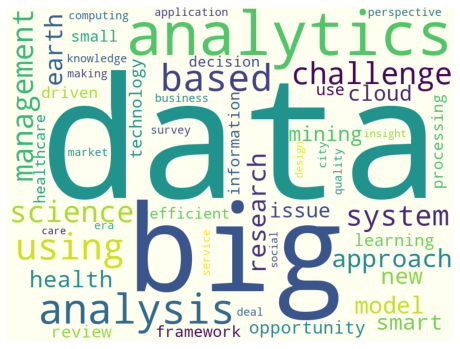

In [38]:
stopwords = set(STOPWORDS)
wc = WordCloud(background_color='ivory', stopwords = stopwords, width= 800, height = 600)
cloud = wc.generate_from_frequencies(word_count)
plt.figure(figsize = (8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [39]:
cloud.to_file("8장_data/riss_bigdata_wordCloud.jpg")